In [ ]:
# In this iteration I used a linear model and adjusted the number of bins in the Classification and Application_Types
# There was no gain in accuracy

In [104]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [105]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [106]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [107]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [128]:
AffilCounts = application_df.AFFILIATION.value_counts()
AffilCounts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [129]:
# Determine which values to replace if counts are less than ...?
replace_affil = list(AffilCounts[AffilCounts < 1000].index)

# Replace in dataframe
for inc in replace_affil:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(inc,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [108]:
IncAmtCounts = application_df.INCOME_AMT.value_counts()
IncAmtCounts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

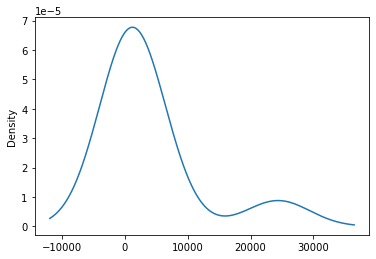

In [109]:
# Visualize the value counts of APPLICATION_TYPE
IncAmtCounts.plot.density()

In [110]:
# Determine which values to replace if counts are less than ...?
replace_inc = list(IncAmtCounts[IncAmtCounts < 1000].index)

# Replace in dataframe
for inc in replace_inc:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(inc,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [111]:
# Look at APPLICATION_TYPE value counts for binning
AppTypeCounts = application_df.APPLICATION_TYPE.value_counts()
AppTypeCounts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

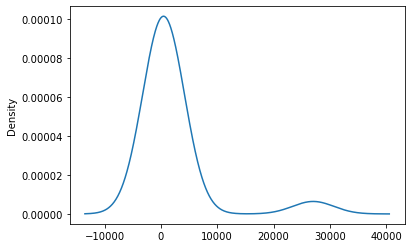

In [112]:
# Visualize the value counts of APPLICATION_TYPE
AppTypeCounts.plot.density()

In [113]:
# Determine which values to replace if counts are less than ...?
replace_application = list(AppTypeCounts[AppTypeCounts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [114]:
# Look at CLASSIFICATION value counts for binning
ClassificationCounts = application_df.CLASSIFICATION.value_counts()
ClassificationCounts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1732        1
C1820        1
C1236        1
C1580        1
C8210        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

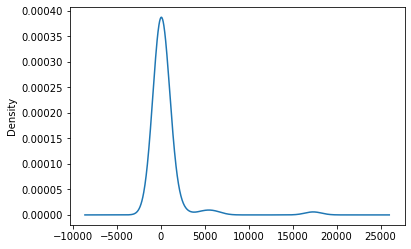

In [115]:
# Visualize the value counts of CLASSIFICATION
ClassificationCounts.plot.density()

In [116]:
# Determine which values to replace if counts are less than ..?
replace_class = list(ClassificationCounts[ClassificationCounts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [130]:
# Generate our categorical variable lists
CatVarList = ['APPLICATION_TYPE', 'CLASSIFICATION', 'AFFILIATION', 'INCOME_AMT']

In [131]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = application_df[['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL']]
for catVar in CatVarList:
    catvar_df = pd.DataFrame(enc.fit_transform(application_df[catVar].values.reshape(-1,1)))
    # Add the encoded variable names to the dataframe
    catvar_df.columns = enc.get_feature_names([catVar])
    encode_df = pd.concat([encode_df, catvar_df], axis=1)
encode_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [132]:
# Split our preprocessed data into our features and target arrays
y = encode_df["IS_SUCCESSFUL"].values
X = encode_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [133]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [121]:
Deliverable 2: Compile, Train and Evaluate the Model

SyntaxError: invalid syntax (<ipython-input-121-b81203ed78f2>, line 1)

In [134]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 6         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [135]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [136]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [137]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [138]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20,callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 4:49 - loss: 0.9088 - accuracy: 0.3750
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.8072 - accuracy: 0.4494  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.7836 - accuracy: 0.4758
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 61/804 [=>..........................


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.6344 - accuracy: 0.6580
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6320 - accuracy: 0.6601
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.6300 - accuracy: 0.6620
Epoch 00001: saving model to checkpoints/weights.01


Epoch 00002: saving model to checkpoints/weights.02.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.5862 - accuracy: 0.7043
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5849 - accuracy: 0.7068
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5860 - accuracy: 0.7065
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02

707/804 [=========================>....] - ETA: 0s - loss: 0.5764 - accuracy: 0.7173
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5760 - accuracy: 0.7179
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5757 - accuracy: 0.7180
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
767/804 [===========================>..] - ETA: 0s -

398/804 [=============>................] - ETA: 1s - loss: 0.5708 - accuracy: 0.7216
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5709 - accuracy: 0.7216
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5721 - accuracy: 0.7202
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5726 - accuracy: 0.7194
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model


Epoch 00004: saving model to checkpoints/weights.04.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5736 - accuracy: 0.7145
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.5722 - accuracy: 0.7167
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.5705 - accuracy: 0.7173
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
148/804 [====>.........................] - ETA: 1s -


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5644 - accuracy: 0.7272
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5650 - accuracy: 0.7263
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5660 - accuracy: 0.7254
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04


Epoch 00005: saving model to checkpoints/weights.05.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.5622 - accuracy: 0.7285
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.5590 - accuracy: 0.7315
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.5601 - accuracy: 0.7302
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5589 - accuracy: 0.7314
Epoch 00005: saving model


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5657 - accuracy: 0.7252
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5662 - accuracy: 0.7247
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5668 - accuracy: 0.7240
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 3s 4ms/st


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5715 - accuracy: 0.7187
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5708 - accuracy: 0.7199
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5706 - accuracy: 0.7200
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
486/804 [=================>............] - ETA: 1s -


Epoch 00007: saving model to checkpoints/weights.07.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.5585 - accuracy: 0.7302
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5585 - accuracy: 0.7300
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5587 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5618 - accuracy: 0.7266
Epoch 00007: saving model

631/804 [======================>.......] - ETA: 0s - loss: 0.5663 - accuracy: 0.7228
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5665 - accuracy: 0.7230
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5667 - accuracy: 0.7226
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
687/804 [========================>.....] - ETA: 0s -

328/804 [===========>..................] - ETA: 1s - loss: 0.5744 - accuracy: 0.7133
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.5731 - accuracy: 0.7150
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5720 - accuracy: 0.7159
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
388/804 [=============>................] - ETA: 1s -


Epoch 00009: saving model to checkpoints/weights.09.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7220
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5761 - accuracy: 0.7156
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.5669 - accuracy: 0.7267
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09

549/804 [===================>..........] - ETA: 0s - loss: 0.5638 - accuracy: 0.7250
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5646 - accuracy: 0.7246
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5648 - accuracy: 0.7244
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
611/804 [=====================>........] - ETA: 0s -


Epoch 00010: saving model to checkpoints/weights.10.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5620 - accuracy: 0.7280
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5627 - accuracy: 0.7266
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.5629 - accuracy: 0.7260
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5659 - accuracy: 0.7237
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5654 - accuracy: 0.7240
Epoch 11/20
  1/804 [..............................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7812
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5760 - accuracy: 0.7247
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 000


Epoch 00011: saving model to checkpoints/weights.11.hdf5
486/804 [=================>............] - ETA: 0s - loss: 0.5646 - accuracy: 0.7247
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.5642 - accuracy: 0.7250
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5655 - accuracy: 0.7237
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
544/804 [===================>..........] - ETA: 0s -


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5668 - accuracy: 0.7256
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5649 - accuracy: 0.7258
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5654 - accuracy: 0.7246
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12


Epoch 00012: saving model to checkpoints/weights.12.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.5647 - accuracy: 0.7243
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5649 - accuracy: 0.7242
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5649 - accuracy: 0.7240
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12

412/804 [==============>...............] - ETA: 1s - loss: 0.5637 - accuracy: 0.7264
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5642 - accuracy: 0.7256
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 0.5644 - accuracy: 0.7251
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
468/804 [================>.............] - ETA: 0s -

117/804 [===>..........................] - ETA: 1s - loss: 0.5722 - accuracy: 0.7163
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.5728 - accuracy: 0.7150
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 0.5707 - accuracy: 0.7175
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
174/804 [=====>........................] - ETA: 1s -

620/804 [======================>.......] - ETA: 0s - loss: 0.5639 - accuracy: 0.7238
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5639 - accuracy: 0.7237
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5644 - accuracy: 0.7234
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5653 - accuracy: 0.7229
Epoch 00014: saving model


Epoch 00015: saving model to checkpoints/weights.15.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5675 - accuracy: 0.7233
Epoch 00015: saving model to checkpoints/weights.15.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.5683 - accuracy: 0.7227
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.5678 - accuracy: 0.7230
Epoch 00015: saving model to checkpoints/weights.15.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5673 - accuracy: 0.7233
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5665 - accuracy: 0.7245
Epoch 00015: saving model to checkpoints/weights.15.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5669 - accuracy: 0.7239
Epoch 00015: saving model to ch

675/804 [========================>.....] - ETA: 0s - loss: 0.5660 - accuracy: 0.7238
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5662 - accuracy: 0.7236
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5664 - accuracy: 0.7232
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5667 - accuracy: 0.7228
Epoch 00015: saving model to checkpoints/weights.15.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5667 - accuracy: 0.7229
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5


272/804 [=========>....................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7338
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.5539 - accuracy: 0.7333
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 0.5576 - accuracy: 0.7298
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.5589 - accuracy: 0.7290
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.5588 - accuracy: 0.7289


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5645 - accuracy: 0.7246
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5645 - accuracy: 0.7245
Epoch 17/20
  1/804 [..............................] - ETA: 2s - loss: 0.5726 - accuracy: 0.7188
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7516
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5647 - accuracy: 0.7247
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5658 - accuracy: 0.7240
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5652 - accuracy: 0.7248
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5677 - accuracy: 0.7206
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5678 - accuracy: 0.7199
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5676 - accuracy: 0.7203
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18

683/804 [========================>.....] - ETA: 0s - loss: 0.5638 - accuracy: 0.7250
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5641 - accuracy: 0.7247
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5637 - accuracy: 0.7251
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
744/804 [==========================>...] - ETA: 0s -


Epoch 00019: saving model to checkpoints/weights.19.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5633 - accuracy: 0.7258
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5623 - accuracy: 0.7264
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5621 - accuracy: 0.7264
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19


Epoch 00020: saving model to checkpoints/weights.20.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.5557 - accuracy: 0.7303
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.5583 - accuracy: 0.7281
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.5588 - accuracy: 0.7312
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20

612/804 [=====================>........] - ETA: 0s - loss: 0.5633 - accuracy: 0.7260
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5628 - accuracy: 0.7264
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5631 - accuracy: 0.7262
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
674/804 [========================>.....] - ETA: 0s -

In [140]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8032 - accuracy: 0.4708
Loss: 0.8032111525535583, Accuracy: 0.4707871675491333


In [141]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharityOptimization2.h5")